___

<a href='http://www.pieriandata.com'> <img src='./Pierian_Data_Logo.png' /></a>
___
# Advising an Ecommerce company - Linear Regression Project

This is an exercise. The costumer data is fake.  
An Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. Insights brought hereare meant to help them figure it out.

## Imports

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 



In [12]:
customers = pd.read_csv("Ecommerce Customers")

In [4]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

**Let's explore the data!**

In [7]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [13]:
customers = customers[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership','Yearly Amount Spent']]

In [14]:
customers.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [22]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


<AxesSubplot:>

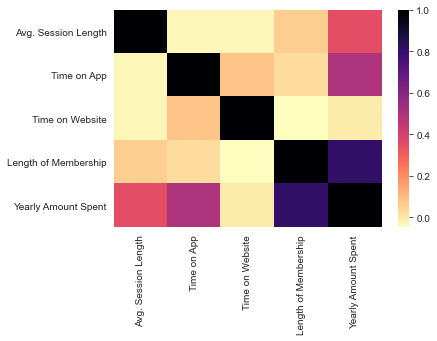

In [24]:
sns.heatmap(customers.corr(), cmap = 'magma_r')

Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?

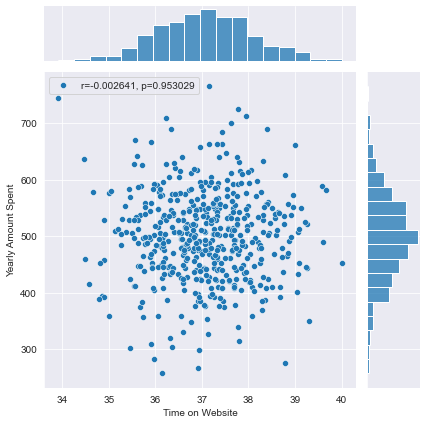

In [38]:
import scipy.stats as stats
graph = sns.jointplot(data=customers,x = 'Time on Website', y = 'Yearly Amount Spent')
r, p = stats.pearsonr(customers['Time on Website'], customers['Yearly Amount Spent'])
graph.ax_joint.legend(['r={:f}, p={:f}'.format(r,p)])
# if you choose to write your own legend, then you should adjust the properties 
# phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
# here graph is not a ax but a joint grid, so we access the axis through ax_joint method
# graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])



 answer: it shows that Time on Website and Yearly Amount Spent  are not correlated..  and both are normaly distributed

** Do the same but with the Time on App column instead. **

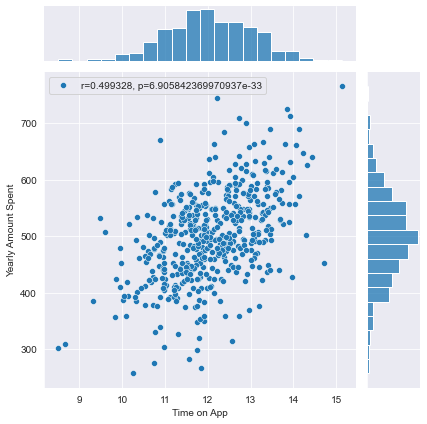

In [41]:
graph1 = sns.jointplot(x = 'Time on App', y = 'Yearly Amount Spent', data = customers, kind = 'scatter')
r, p = stats.pearsonr(customers['Time on App'], customers['Yearly Amount Spent'])
graph1.ax_joint.legend(['r={:f}, p={}'.format(r,p)])

** Comparing Time on App and Length of Membership.**

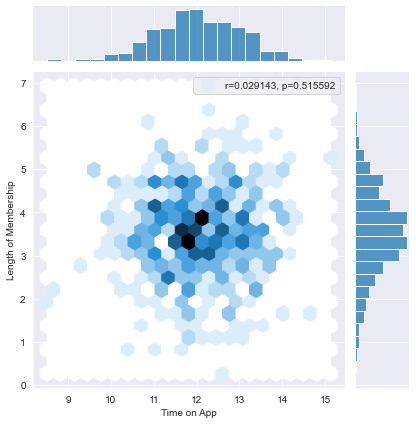

In [47]:
graph1 = sns.jointplot(x = 'Time on App', y = 'Length of Membership', data = customers, kind = 'hex')
r, p = stats.pearsonr(customers['Time on App'], customers['Length of Membership'])
phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
graph1.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])

**Let's explore these types of relationships across the entire data set, I'll be using [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot)**

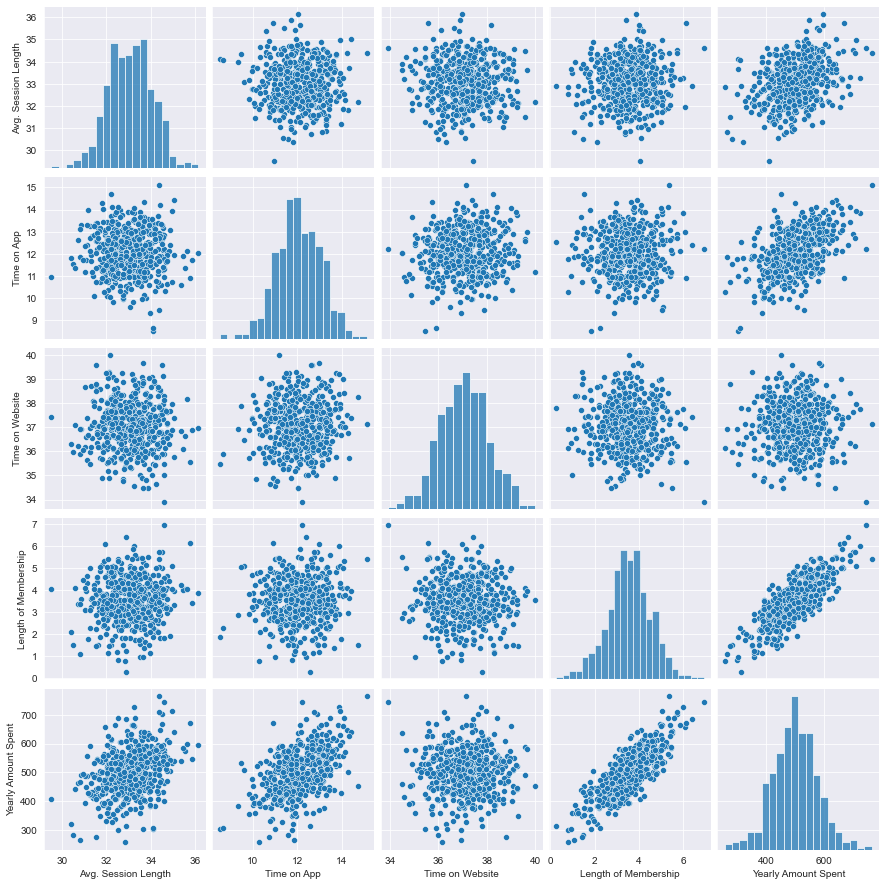

In [48]:
sns.pairplot(customers)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

answer: length of membership (no surprise).. and more time on app rather than the other two features.

**Create a linear model plot of  Yearly Amount Spent vs. Length of Membership. **

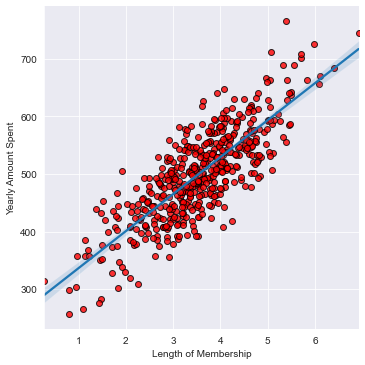

In [59]:
sns.lmplot(data = customers, x = 'Length of Membership', y = 'Yearly Amount Spent', scatter_kws = {'facecolors':'red', 'edgecolors':'black'})
#sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm', markers=['o','v'],scatter_kws={'s':100})

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [60]:
customers.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [61]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website','Length of Membership']]
y = customers['Yearly Amount Spent']

** model_selection.train_test_split from sklearn to split the data into training and testing sets (test_size=0.3 and random_state=101) **

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the model, predicting test data and Evaluating the model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [64]:
from  sklearn.linear_model import LinearRegression

In [65]:
lm = LinearRegression()

In [66]:
lm.fit(X_train, y_train) # Train/fit lm on the training data

LinearRegression()

In [68]:
cdf = pd.DataFrame(lm.coef_, index = X.columns, columns = ['Coeff'])

In [69]:
cdf #

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


### Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [71]:
y_predict = lm.predict(X_test)

** Create a scatterplot of the real test values versus the predicted values. **

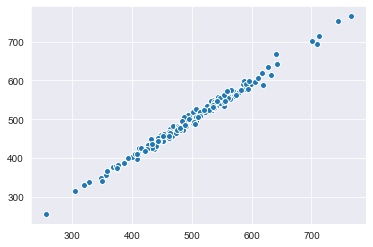

In [77]:
plt.scatter(x = y_test, y = y_predict, edgecolors='white')

highly correlated! great :-)

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [79]:
from sklearn import metrics

In [86]:
print(f'MAE :{metrics.mean_absolute_error(y_test, y_predict)}')
print(f'MSE: {metrics.mean_squared_error(y_test, y_predict)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_predict))}')
print(f'R^2: {metrics.explained_variance_score(y_test, y_predict)}')

MAE :7.228148653430834
MSE: 79.81305165097453
RMSE: 8.933815066978639
R^2: 0.9890771231889606


## Residuals

The model is very good with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plotting a histogram of the residuals and making sure it looks normally distributed.**

<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

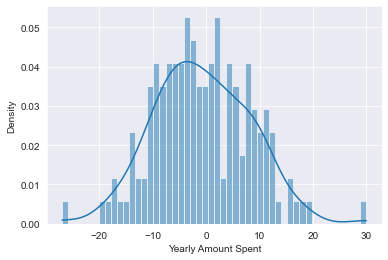

In [84]:
sns.histplot(y_test-y_predict, stat="density", kde=True, bins = 50 )

## Conclusion
We still want to figure out the answer to the original question: **do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important?**  Let's see if we can interpret the coefficients at all to get an idea.

In [85]:
cdf

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


** How can we interpret these coefficients? **

yes.
well, there is no doubt the app is more affective. each minute spent on **app** corresponds to alomst 40$ bought. 
when same amout of time spent on the **website** , contributes **LESS** 2 times in magnitude. 

**Do you think the company should focus more on their mobile app or on their website?**

there are two ways of looking at it: 
1. the app doest a good job so invest there. 
but I think the other way of looking at it, matters a lot as well, and perhaps even more: 
2. **there is definately a problem with the website.** the website hardly contributes to the annual benfits.

with that being said, the company SHOULD FOCUS ON THE WEBSITE - that is doing poorly. we should try to see if some effort can change that. And it really depands how much effort should be put there in correspondance to the expected annual benefit.

## End

Congrats on your contract work! The company loved the insights! Let's move on. 